<a href="https://colab.research.google.com/github/leonardo-91/tesis_fabio/blob/main/Tesis_Fabio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprosesamiento de imagenes**

Librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from datetime import datetime
from datetime import timedelta
import math
import os
import shutil

Leemos clasificacion

In [ ]:
ruta_fabio="/content/drive/MyDrive/Tesis Fabio/clasificacion_joyas/insumos/clasificacion_producto/linea_label.csv"
ruta_leo="/content/drive/MyDrive/Tesis Fabio/clasificacion_joyas/insumos/clasificacion_producto/linea_label (1).csv"
df_lineas=pd.read_csv(ruta_fabio)

In [ ]:
df_lineas.head(10)

In [ ]:
df_lineas.info()

In [ ]:
df_lineas.IdLinea_Label=df_lineas.IdLinea_Label.astype('Int64')

In [ ]:
df_lineas.head()

In [ ]:
df_lineas.NombreLinea.value_counts()

**Crear carpeta de Train**

In [ ]:
df_lineas.NombreLinea= df_lineas.NombreLinea.str.strip().str.replace(' ', '_').str.lower()

In [ ]:
df_lineas.NombreLinea.value_counts()

**Recorrer muestra de imagenes**

In [ ]:
df_muestra=pd.read_csv("/content/drive/MyDrive/Tesis Fabio/clasificacion_joyas/dataset2/muestra.csv")

In [ ]:
df_muestra.head()

In [ ]:
df_muestra.count()

**UnirDF**

In [ ]:
df_unido=pd.merge(df_muestra,df_lineas,on='IdLinea_Label')

In [ ]:
df_unido.count()

In [ ]:
df_unido.head()

***Revisar cuantos nombres tenemos***

In [ ]:
df_unido.NombreLinea.value_counts()

In [ ]:
df_unido.IdLinea_Label.value_counts()

In [ ]:
df_unido[["IdProducto","NombreLinea"]].value_counts()

**Armado de carpeta de Train**

Limpiamos caracteres especiales

In [ ]:
df_unido['IdProducto']=df_unido['IdProducto'].astype(str).str.replace("'", "")

In [ ]:
df_unido[['IdProducto', 'NombreLinea']].drop_duplicates()

In [ ]:
ruta_origen = "/content/drive/MyDrive/Tesis Fabio/clasificacion_joyas/dataset2/images/train"
ruta_destino = "/content/drive/MyDrive/Tesis Fabio/dataset2/train"


df_map = df_unido[['IdProducto', 'NombreLinea']].drop_duplicates()

# Diccionario: {1: "anillo", 2: "anillo", 3: "brazalete"}
mapa_productos = dict(zip(df_map['IdProducto'], df_map['NombreLinea']))

# === RECORRER Y COPIAR ===
for nombre_img in os.listdir(ruta_origen):
    if not nombre_img.endswith('.jpg'):
        continue

    try:
        id_producto = nombre_img.split('_')[0]  # extrae "1" de "1_fecha.jpg"
    except:
        print(f"❌ No se pudo interpretar id_producto en: {nombre_img}")
        continue

    if id_producto in mapa_productos:
        clase = mapa_productos[id_producto]
        carpeta_clase = os.path.join(ruta_destino, clase)
        os.makedirs(carpeta_clase, exist_ok=True)

        origen = os.path.join(ruta_origen, nombre_img)
        destino = os.path.join(carpeta_clase, nombre_img)
        shutil.copy(origen, destino)
    else:
        print(f"⚠️ id_producto {id_producto} no encontrado en df para {nombre_img}")

**Armado de carpeta de Val**

In [ ]:
ruta_origen = "/content/drive/MyDrive/Tesis Fabio/clasificacion_joyas/dataset2/images/val"
ruta_destino = "/content/drive/MyDrive/Tesis Fabio/dataset2/val"


df_map = df_unido[['IdProducto', 'NombreLinea']].drop_duplicates()

# Diccionario: {1: "anillo", 2: "anillo", 3: "brazalete"}
mapa_productos = dict(zip(df_map['IdProducto'], df_map['NombreLinea']))

# === RECORRER Y COPIAR ===
for nombre_img in os.listdir(ruta_origen):
    if not nombre_img.endswith('.jpg'):
        continue

    try:
        id_producto = nombre_img.split('_')[0]  # extrae "1" de "1_fecha.jpg"
    except:
        print(f"❌ No se pudo interpretar id_producto en: {nombre_img}")
        continue

    if id_producto in mapa_productos:
        clase = mapa_productos[id_producto]
        carpeta_clase = os.path.join(ruta_destino, clase)
        os.makedirs(carpeta_clase, exist_ok=True)

        origen = os.path.join(ruta_origen, nombre_img)
        destino = os.path.join(carpeta_clase, nombre_img)
        shutil.copy(origen, destino)
    else:
        print(f"⚠️ id_producto {id_producto} no encontrado en df para {nombre_img}")

Instalar YOLO

In [5]:
!pip install -q ultralytics

In [7]:
from ultralytics import YOLO

In [10]:
model = YOLO('yolov8n-cls.pt')

In [11]:
# Entrenar con tus imágenes
model.train(
    data='/content/drive/MyDrive/Tesis Fabio/dataset2',  # Ajusta si tu ruta es distinta
    epochs=10,
    imgsz=448
)

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Tesis Fabio/dataset2, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=448, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

train: Scanning /content/drive/MyDrive/Tesis Fabio/dataset2/train... 354 images, 0 corrupt: 100%|██████████| 354/354 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 49.2±8.5 MB/s, size: 152.6 KB)



val: Scanning /content/drive/MyDrive/Tesis Fabio/dataset2/val... 90 images, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 448 train, 448 val
Using 0 dataloader workers
Logging results to runs/classify/train5
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:10<00:00,  3.62s/it]

                   all      0.789          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:10<00:00,  3.59s/it]

                   all      0.778          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  3.84s/it]

                   all      0.911          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  3.78s/it]

                   all      0.911          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  3.78s/it]

                   all      0.911          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  3.69s/it]

                   all      0.956          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  3.95s/it]

                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  3.81s/it]

                   all      0.956          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:10<00:00,  3.59s/it]

                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size



      10/10         0G    0.09184          2        448: 100%|██████████| 23/23 [01:33<00:00,  4.08s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:15<00:00,  5.12s/it]

                   all      0.989          1

10 epochs completed in 0.302 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 3.0MB


Optimizer stripped from runs/classify/train5/weights/best.pt, 3.0MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Tesis Fabio/dataset2/train... found 354 images in 5 classes ✅ 
val: /content/drive/MyDrive/Tesis Fabio/dataset2/val... found 90 images in 5 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:10<00:00,  3.60s/it]


                   all      0.989          1
Speed: 0.0ms preprocess, 53.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bdb44ced590>
curves: []
curves_results: []
fitness: 0.9944444298744202
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9888888597488403, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9944444298744202}
save_dir: PosixPath('runs/classify/train5')
speed: {'preprocess': 0.0007514444102222722, 'inference': 53.92242677775761, 'loss': 4.913328868699157e-05, 'postprocess': 0.0003195555715744073}
task: 'classify'
top1: 0.9888888597488403
top5: 1.0

**Ver resultados**

In [ ]:
from IPython.display import Image, display
display(Image("/content/runs/classify/train/confusion_matrix.png"))
display(Image("/content/runs/classify/train/results.png"))

**Probamos el Modelo**

In [13]:
# Asegúrate de usar la ruta al modelo que entrenaste
model = YOLO('/content/runs/classify/train5/weights/best.pt')

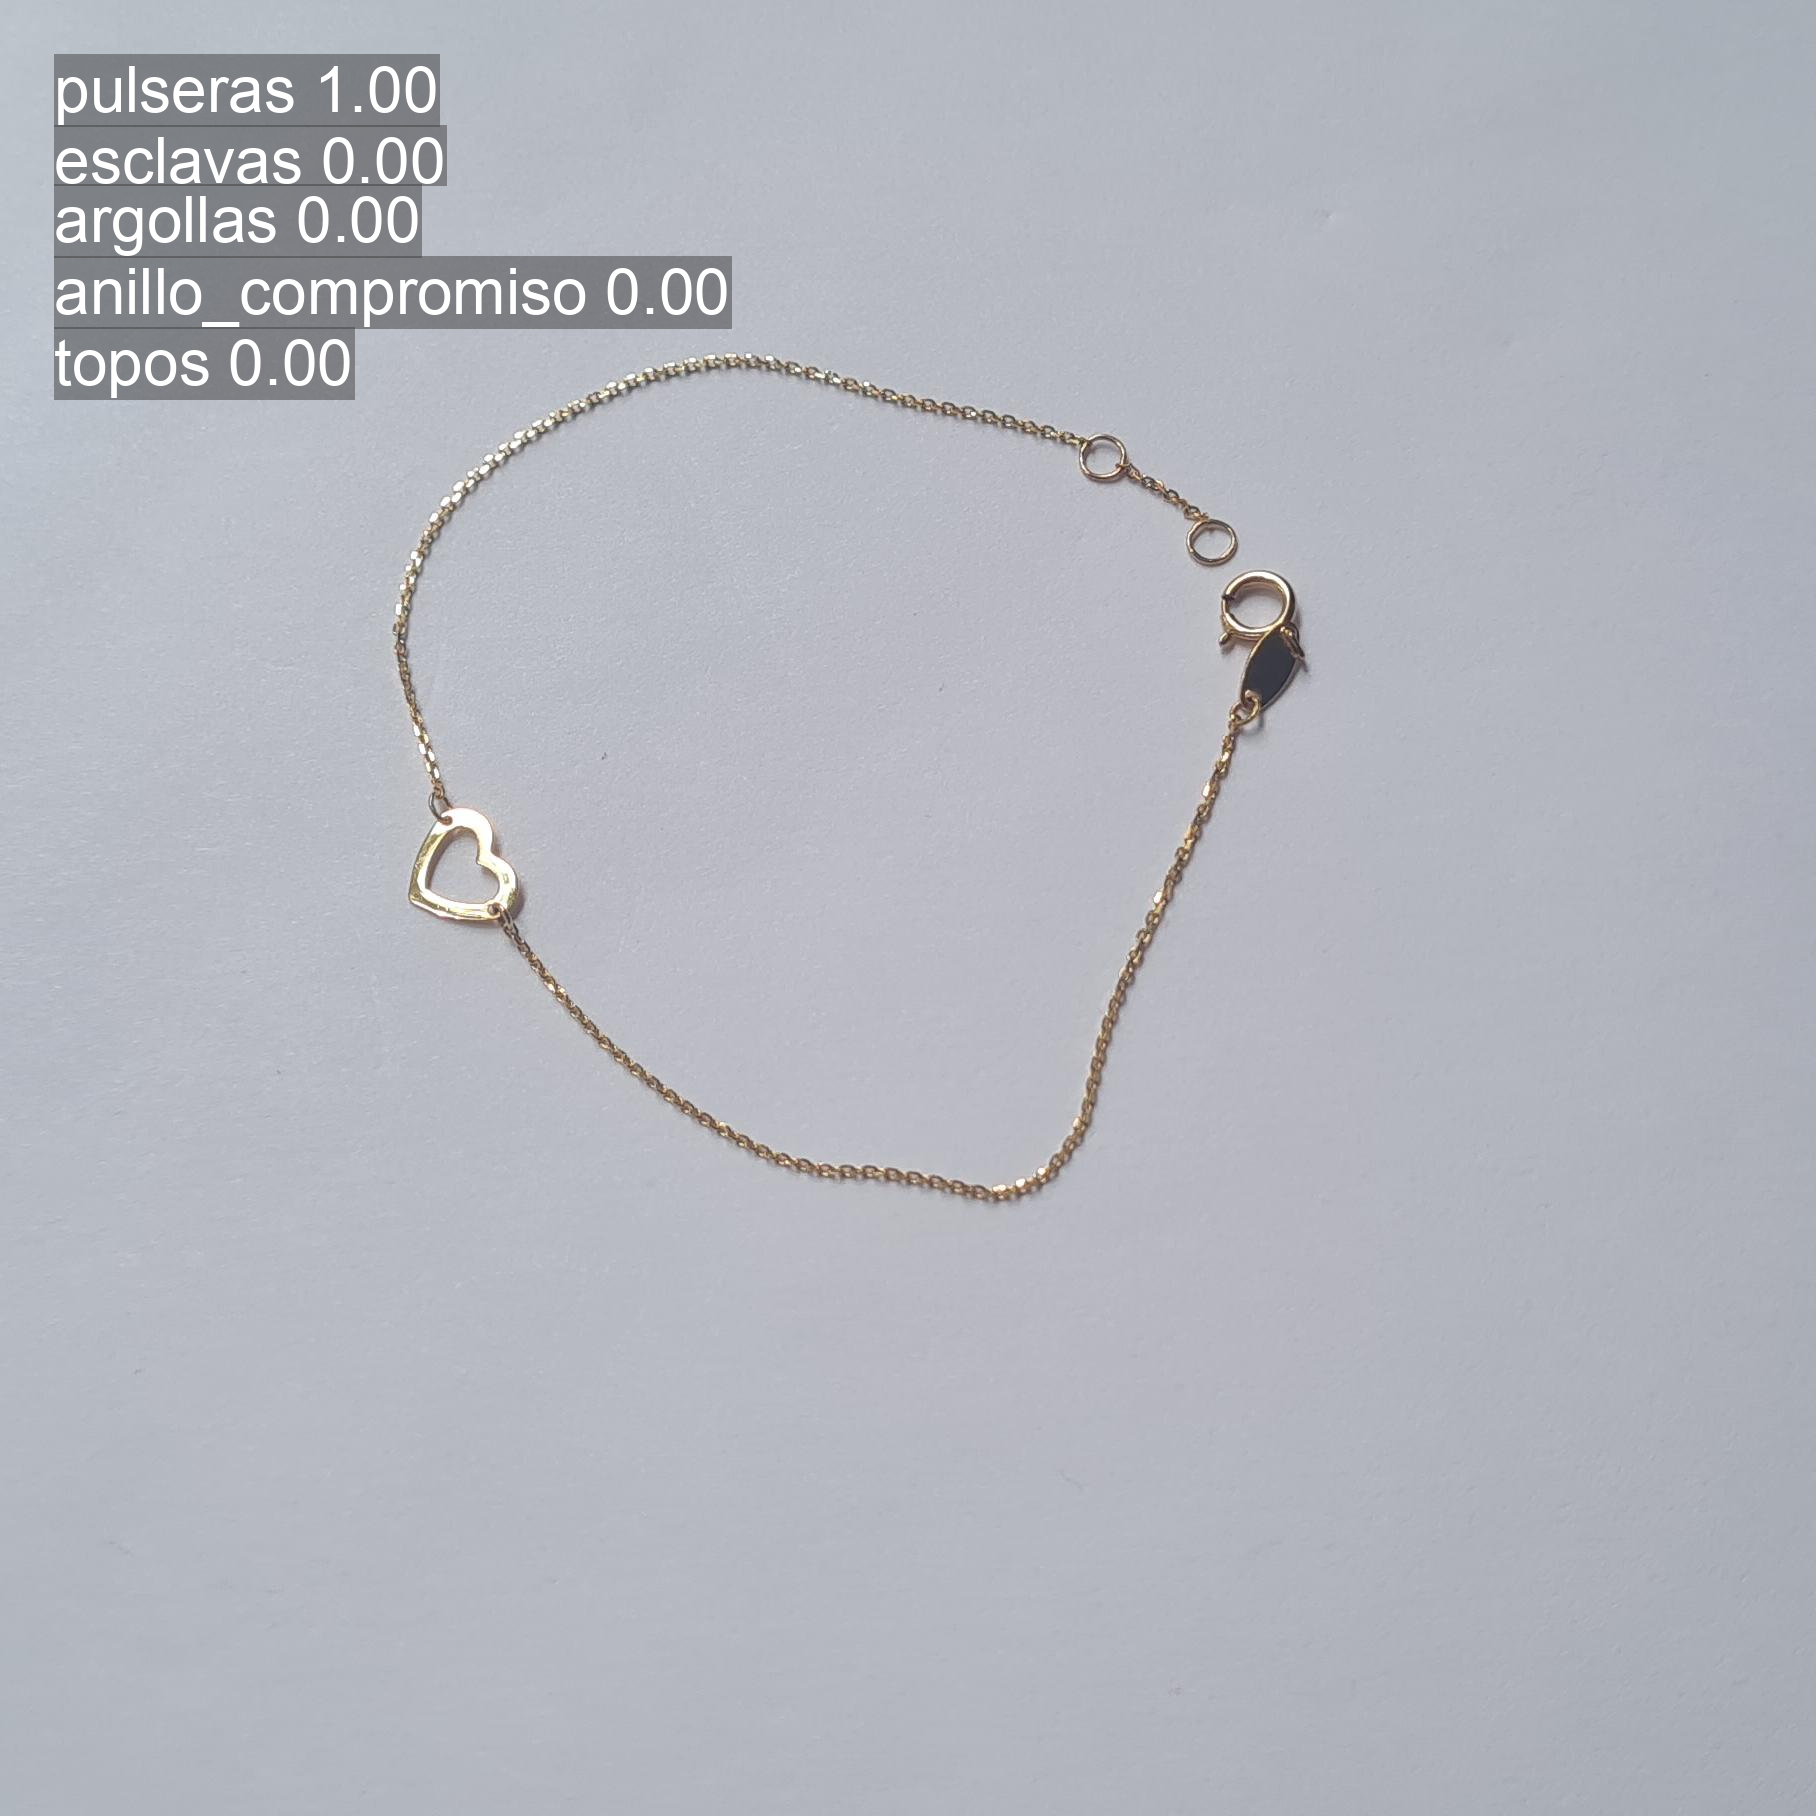

In [14]:
results2 = model.predict('/content/drive/MyDrive/Tesis Fabio/dataset2/val/pulseras/1310001008_20250525_104051.jpg')
results2[0].show()

Testeo del modeo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Obtener rutas de imágenes de validación
val_dir = "/content/drive/MyDrive/Tesis Fabio/dataset2/val"
clases = sorted(os.listdir(val_dir))

print(clases)



In [ ]:
y_true = []
y_pred = []

for i, clase in enumerate(clases):
    print(f"Procesando clase: {clase}")
    clase_dir = os.path.join(val_dir, clase)
    for img_name in os.listdir(clase_dir):
        img_path = os.path.join(clase_dir, img_name)
        print(f"img_name: {img_name}")
        results = model.predict(img_path, verbose=False)
        pred = results[0].probs.top1  # índice de la clase predicha
        y_true.append(i)
        print(f"Procesando clase valor: {i}")
        print(f"Procesando clase valorpredicho: {pred}")
        y_pred.append(pred)

**Metricas Modelo**

In [ ]:
print("✅ Métricas de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=clases))

# También puedes mostrar la matriz de confusión en texto
print("📌 Matriz de confusión:")
print(confusion_matrix(y_true, y_pred))

**Descargar modelo**

In [ ]:
import shutil

shutil.make_archive('/content/runs/classify/train', 'zip', '/content/runs/classify/')

**Validar todo del modelo**

In [ ]:
val_dir = "/content/drive/MyDrive/Tesis Fabio/dataset2/val/topos"
clases = sorted(os.listdir(val_dir))
for  nombre_img in os.listdir(val_dir):
  ruta_imagen = os.path.join(val_dir, nombre_img)
  results3 = model.predict(ruta_imagen)
  results3[0].show()

**API de YOLO para visualizacion**

In [25]:
!pip install gradio

Name: gradio
Version: 3.50.2
Summary: Python library for easily interacting with trained machine learning models
Home-page: https://github.com/gradio-app/gradio
Author: 
Author-email: Abubakar Abid <team@gradio.app>, Ali Abid <team@gradio.app>, Ali Abdalla <team@gradio.app>, Dawood Khan <team@gradio.app>, Ahsen Khaliq <team@gradio.app>, Pete Allen <team@gradio.app>, Ömer Faruk Özdemir <team@gradio.app>
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiofiles, altair, fastapi, ffmpy, gradio-client, httpx, huggingface-hub, importlib-resources, jinja2, markupsafe, matplotlib, numpy, orjson, packaging, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, requests, semantic-version, typing-extensions, uvicorn, websockets
Required-by: 


In [15]:
from ultralytics import YOLO
import gradio as gr
from PIL import Image

# Cargar modelo
model = YOLO("/content/runs/classify/train5/weights/best.pt")  # Ajusta la ruta

# Función para clasificar
def clasificar_imagen(image):
    image = image.convert("RGB")
    results = model.predict(image, verbose=False)
# Obtener diccionario clase: probabilidad
    probs = results[0].probs
    clases = probs.data.tolist()
    nombres = results[0].names

    # Combinar nombre y score, ordenar de mayor a menor
    predicciones = sorted(
        [(nombres[i], round(score, 4)) for i, score in enumerate(clases)],
        key=lambda x: x[1],
        reverse=True
    )

    # Formatear resultado como string multilinea
    salida = "\n".join([f"{clase}: {confianza}" for clase, confianza in predicciones])
    return salida

# Interfaz
gr.Interface(fn=clasificar_imagen, inputs=gr.Image(type="pil"), outputs="text").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://db3f1838a4edbbeeac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
